# HEART DISEASE PROJECT
The following procedures outline the resolution of this issue.

## PROBLEM DEFINITION
The given patient data will be used to investigate the possibility of heart disease or not.

## DATA
The original data came from the Cleveland database from UCI Machine Learning Repository.
However, I downloaded it in a formatted way from Kaggle.

## EVALUATION
I will pursue this project if I can predict whether or not a patient has heart disease with 95% accuracy during the proof of concept.

## FEATURES
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. 
It contains 76 attributes, including the predicted attribute, but all published experiments use a subset of 14. 
The "target" field refers to the presence of heart disease in the patient. It is an integer valued 0 = no disease and 1 = disease.

Attribute Information
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise-induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## MODELLING
I will be using various classification modeling tools or estimators in the scikit learn documentation.

In [14]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Models
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [16]:
# import data
heart_disease_df = pd.read_csv("heart.csv")
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Exploratory Data Analysis on the Data

In [19]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [21]:
# getting statistical information on the data
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
# checking for NaN values
heart_disease_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
# number of males and females patients
heart_disease_df["sex"].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

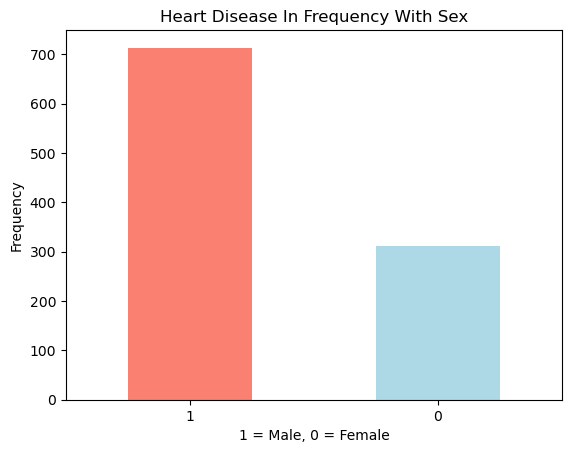

In [71]:
heart_disease_df["sex"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.xticks(rotation = 0);
plt.xlabel("1 = Male, 0 = Female");
plt.ylabel("Frequency");
plt.title("Heart Disease In Frequency With Sex");

In [35]:
# checking the target column to check the know how many people get heart disease and those without heart disease
heart_disease_df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

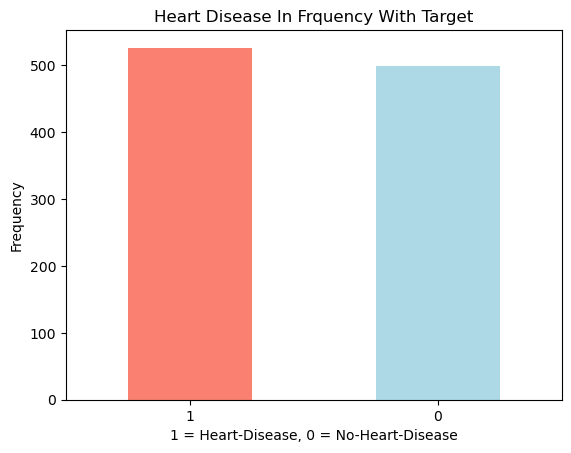

In [73]:
heart_disease_df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.xticks(rotation=0);
plt.ylabel("Frequency")
plt.title("Heart Disease In Frquency With Target");
plt.xlabel("1 = Heart-Disease, 0 = No-Heart-Disease");


In [47]:
pd.crosstab(heart_disease_df["sex"], heart_disease_df["target"])

target,0,1
sex,,
0,86,226
1,413,300


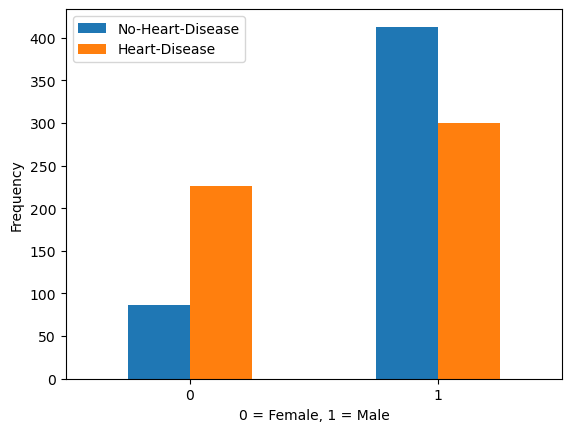

In [51]:
pd.crosstab(heart_disease_df["sex"], heart_disease_df["target"]).plot(kind="bar");
plt.xticks(rotation = 0);
plt.xlabel("0 = Female, 1 = Male");
plt.ylabel("Frequency");
plt.legend(["No-Heart-Disease", "Heart-Disease"]);

In [53]:
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [57]:
heart_disease_df["age"].value_counts()

age
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64

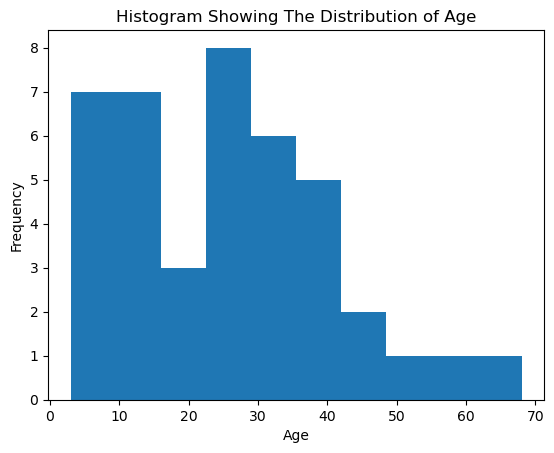

In [61]:
# checking the distribution of age with histogram
heart_disease_df["age"].value_counts().plot(kind="hist");
plt.xlabel("Age");
plt.title("Histogram Showing The Distribution of Age");

In [63]:
# heart disease frequency per chest pain type
pd.crosstab(heart_disease_df["cp"], heart_disease_df["target"])

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


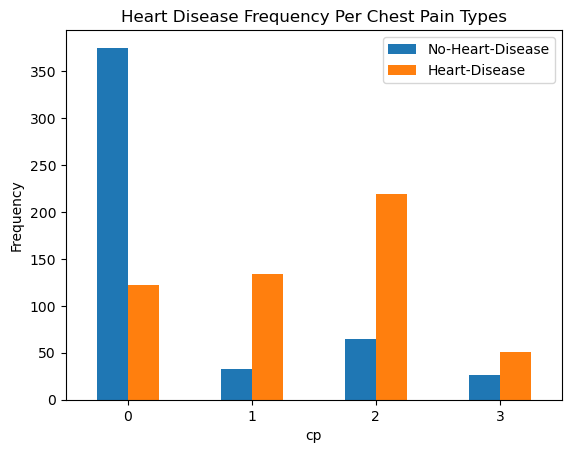

In [69]:
pd.crosstab(heart_disease_df["cp"], heart_disease_df["target"]).plot(kind="bar");
plt.xticks(rotation=0);
plt.ylabel("Frequency");
plt.title("Heart Disease Frequency Per Chest Pain Types");
plt.legend(["No-Heart-Disease", "Heart-Disease"]);

In [75]:
# making a correlation matrix
heart_disease_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


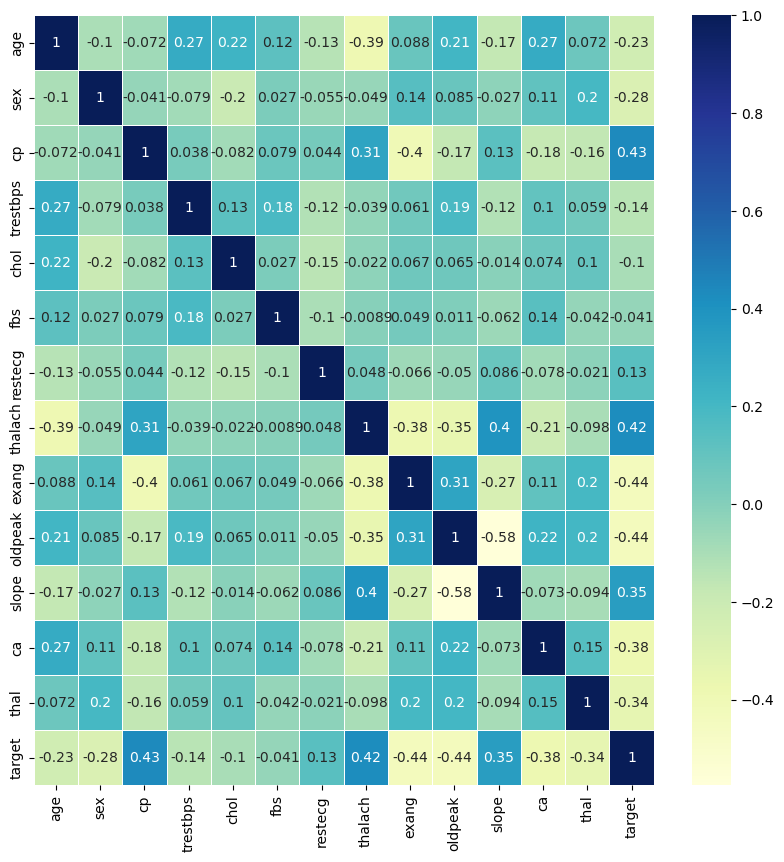

In [85]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(heart_disease_df.corr(),
                 annot=True,
                 linewidths=0.5,
                 cmap="YlGnBu")

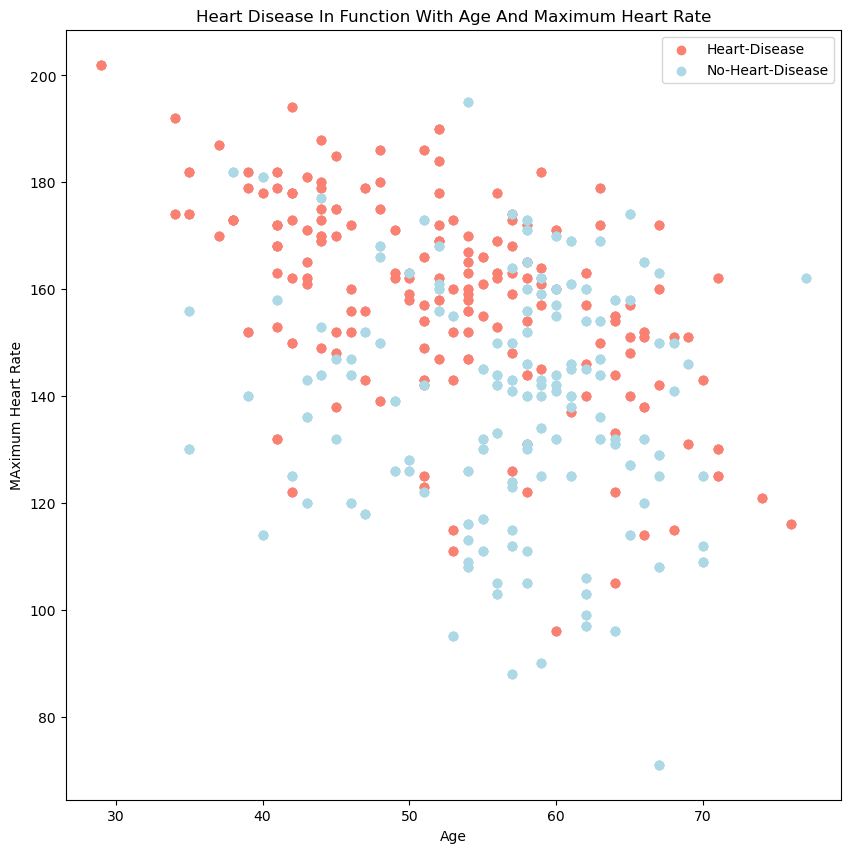

In [101]:
# heart disease in function of age and maximum heart rate
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(heart_disease_df["age"][heart_disease_df["target"]==1],
           heart_disease_df["thalach"][heart_disease_df["target"]==1],
           color="salmon");

ax.scatter(heart_disease_df["age"][heart_disease_df["target"]==0],
           heart_disease_df["thalach"][heart_disease_df["target"]==0],
           color="lightblue");
ax.legend(["Heart-Disease", "No-Heart-Disease"]);
plt.title("Heart Disease In Function With Age And Maximum Heart Rate");
plt.xlabel("Age");
plt.ylabel("MAximum Heart Rate");

## MODELING

In [104]:
# checking the datatypes of the data
heart_disease_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [106]:
# checking to see if there are any NaN values in the data
heart_disease_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [108]:
# splitting the data into X and y
X = heart_disease_df.drop("target", axis=1)
y = heart_disease_df["target"]


In [110]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [112]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [120]:
# splitting the data into traina nd test sets
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [118]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

In [122]:
np.random.seed(0)

models = {"LinearSVC" : LinearSVC(),
          "DecisionTreeClassifier" : DecisionTreeClassifier(),
          "LogisticRegression" : LogisticRegression(),
          "RandomForestClassifier" : RandomForestClassifier(),
          "KNeighborsClassifier" : KNeighborsClassifier()}

# creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluates given machine learning models
    models  : a dict of different Scikit_Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : training labels
    y_test : test labels
    """
    # set random seed
    np.random.seed(0)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to the model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [124]:
np.random.seed(0)
baseline_models = fit_and_score(models,
                                X_train = X_train,
                                X_test = X_test, 
                                y_train = y_train,
                                y_test = y_test)
baseline_models

C:\Users\David\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\David\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\David\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8634146341463415,
 'DecisionTreeClassifier': 1.0,
 'LogisticRegression': 0.8634146341463415,
 'RandomForestClassifier': 1.0,
 'KNeighborsClassifier': 0.7463414634146341}

In [126]:
baseline_models = pd.DataFrame(baseline_models,
                               index=["accuracy"])
baseline_models

,LinearSVC,DecisionTreeClassifier,LogisticRegression,RandomForestClassifier,KNeighborsClassifier
accuracy,0.863415,1.0,0.863415,1.0,0.746341


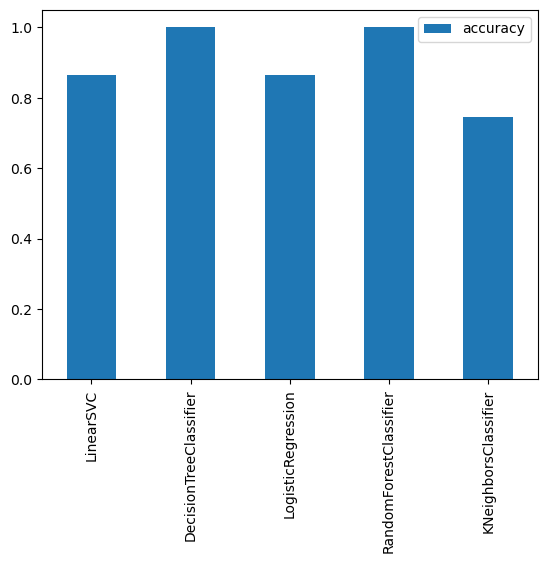

In [234]:
baseline_models.T.plot(kind="bar");

# 
According to the baseline model and metrics, RandomForestClassifier and DecisionTreeClassifier had the best
performance on the validating sets, followed by LinearSVC and LogisticRegression, and lastly followed by KNeighborsClassifier.
Since we do not have enough data, lets get rid of the LinearSVC, LogisticRegression and KNeighborsClassifier and evaluate upon the rest of the model

In [158]:
# evaluating the models using the cross_val_score parameter
clf_1 = DecisionTreeClassifier()
accuracy = cross_val_score(clf_1, X, y, scoring="accuracy")
accuracy = np.mean(accuracy)
accuracy

0.9970731707317073

In [160]:
recall = cross_val_score(clf_1, X, y, scoring="recall")
recall = np.mean(recall)
recall

0.9942857142857143

In [162]:
precision = cross_val_score(clf_1, X, y, scoring="precision")
precision = np.mean(precision)
precision

1.0

In [164]:
f1 = cross_val_score(clf_1, X, y, scoring="f1")
f1 = np.mean(f1)
f1

0.9903194034050935

In [182]:
evaluate_models = pd.DataFrame({"accuracy": round(accuracy,2)*100,
                                "recall": round(recall,2)*100,
                                "precision": round(precision,2)*100,
                                "f1": round(f1,2)*100},
                              index=["DecisionTreeClassifier"])
evaluate_models

,accuracy,recall,precision,f1
DecisionTreeClassifier,99.0,100.0,99.0,100.0


In [170]:
clf_2 = RandomForestClassifier()
accuracy = cross_val_score(clf_2, X, y, scoring="accuracy")
accuracy = np.mean(accuracy)
accuracy

0.9941463414634146

In [172]:
recall = cross_val_score(clf_2, X, y, scoring="recall")
recall = np.mean(recall)
recall

1.0

In [174]:
precision = cross_val_score(clf_2, X, y, scoring="precision")
precision = np.mean(precision)
precision

0.9889398572884811

In [176]:
f1 = cross_val_score(clf_2, X, y, scoring="f1")
f1 = np.mean(f1)
f1

0.9972093023255815

In [178]:
evaluate_model = pd.DataFrame({"accuracy": round(accuracy,2)*100,
                                "recall": round(recall,2)*100,
                                "precision": round(precision,2)*100,
                                "f1": round(f1,2)*100},
                              index=["RandomForestClassifier"])
evaluate_model

,accuracy,recall,precision,f1
RandomForestClassifier,99.0,100.0,99.0,100.0


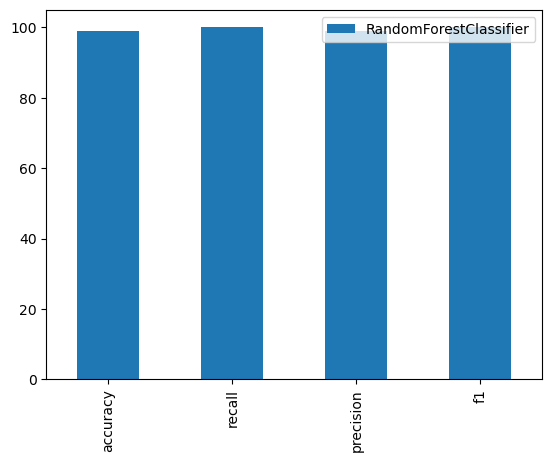

In [188]:
evaluate_model.T.plot(kind="bar");

In [192]:
clf_2.fit(X_train, y_train)

RandomForestClassifier()

In [194]:
y_pred = clf_2.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1], dtype=int64)

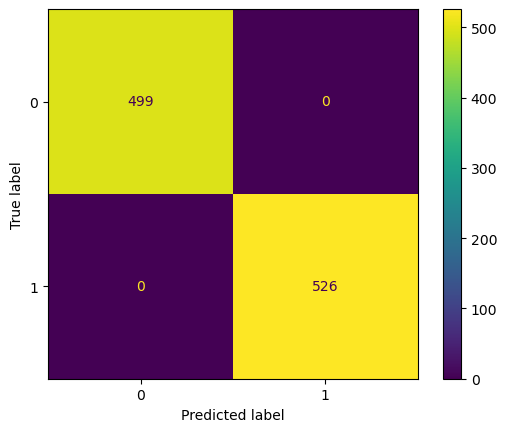

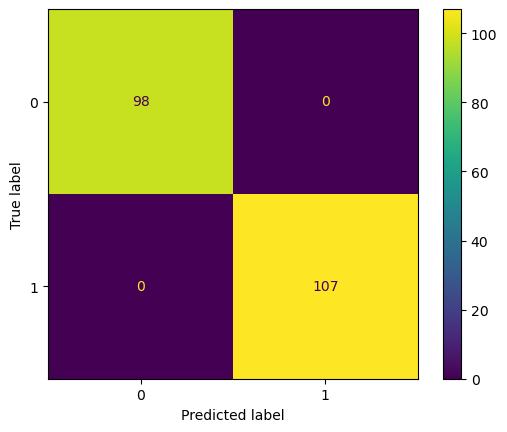

In [202]:
# Confusion Matrix Plot
ConfusionMatrixDisplay.from_estimator(clf_2, X, y); ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [204]:
# ploting ROC curve and checking the roc_auc_score
y_pos = clf_2.predict_proba(X_test)
y_pos

array([[0.02, 0.98],
       [0.82, 0.18],
       [0.99, 0.01],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.94, 0.06],
       [0.99, 0.01],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.91, 0.09],
       [0.01, 0.99],
       [0.08, 0.92],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.06, 0.94],
       [0.01, 0.99],
       [0.06, 0.94],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.01, 0.99],
       [0.97, 0.03],
       [0.98, 0.02],
       [0.01, 0.99],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.77, 0.23],
       [1.  , 0.  ],
       [0.16, 0.84],
       [0.01, 0.99],
       [0.98, 0.02],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.04, 0.96],
       [0.02, 0.98],
       [0.93,

In [206]:
y_positive = y_pos[:,1]
y_positive

array([0.98, 0.18, 0.01, 1.  , 0.  , 0.06, 0.01, 0.03, 0.  , 0.04, 0.02,
       0.  , 1.  , 0.09, 0.99, 0.92, 1.  , 0.01, 1.  , 0.03, 1.  , 0.94,
       0.99, 0.94, 0.92, 0.99, 0.98, 0.03, 1.  , 0.97, 0.99, 0.03, 0.02,
       0.99, 0.03, 0.  , 0.23, 0.  , 0.84, 0.99, 0.02, 0.98, 1.  , 0.99,
       0.98, 0.96, 0.98, 0.07, 0.  , 0.08, 0.05, 0.  , 0.94, 0.05, 0.01,
       0.  , 0.  , 0.93, 0.1 , 0.18, 0.  , 0.02, 1.  , 0.06, 0.04, 0.05,
       0.  , 0.98, 0.93, 0.96, 0.93, 0.99, 1.  , 0.  , 0.06, 0.1 , 0.08,
       0.88, 0.02, 0.  , 0.04, 0.01, 0.97, 0.11, 0.99, 0.  , 0.99, 0.  ,
       1.  , 0.  , 0.01, 0.  , 0.99, 0.91, 0.95, 0.04, 0.06, 0.  , 0.95,
       1.  , 0.93, 0.8 , 0.99, 0.07, 0.01, 0.98, 0.  , 0.92, 0.01, 0.95,
       0.96, 0.06, 0.99, 0.07, 0.94, 0.06, 0.93, 0.02, 0.03, 0.8 , 0.01,
       0.84, 1.  , 0.  , 0.05, 1.  , 1.  , 0.91, 0.99, 0.02, 0.  , 0.01,
       0.99, 0.99, 0.94, 0.06, 0.  , 0.99, 0.  , 1.  , 0.97, 0.01, 0.93,
       0.01, 0.23, 0.99, 0.99, 0.89, 0.92, 0.05, 0.

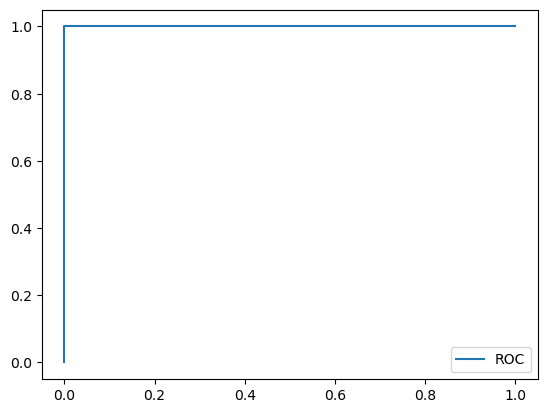

In [208]:
#plotting ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_positive)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, label="ROC")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [210]:
roc_auc_score(y_test, y_positive)


1.0

In [212]:
evaluate_model

,accuracy,recall,precision,f1
RandomForestClassifier,99.0,100.0,99.0,100.0


In [214]:
evaluate_models

,accuracy,recall,precision,f1
DecisionTreeClassifier,99.0,100.0,99.0,100.0


#
After evaluating the models, it was observed that both RandomForestClassifier and DecisionTreeClassifier had an accuracy of 99.0%, a recall and f1 score of 100%.
Considering the balanced distribution of classes in the dataset, I will prioritize either recall or f1. Both RandomForestClassifier and DecisionTreeClassifier
model achieved a recall and f1 of 100%

## Feature Importance

In [220]:
clf_2.feature_importances_

array([0.08477168, 0.04306026, 0.14414174, 0.06946406, 0.08696801,
       0.00968428, 0.02013499, 0.11567294, 0.06003786, 0.11319378,
       0.04223444, 0.11332378, 0.09731216])

In [224]:
features_dict = dict(zip(heart_disease_df.columns, list(clf_2.feature_importances_)))
features_dict

{'age': 0.08477168091402237,
 'sex': 0.043060257212960536,
 'cp': 0.14414174484857098,
 'trestbps': 0.06946406445340232,
 'chol': 0.08696801144207801,
 'fbs': 0.009684280592973283,
 'restecg': 0.020134994304296272,
 'thalach': 0.11567294379433223,
 'exang': 0.06003786444288829,
 'oldpeak': 0.11319377780343415,
 'slope': 0.04223444367873625,
 'ca': 0.11332377714104641,
 'thal': 0.09731215937125907}

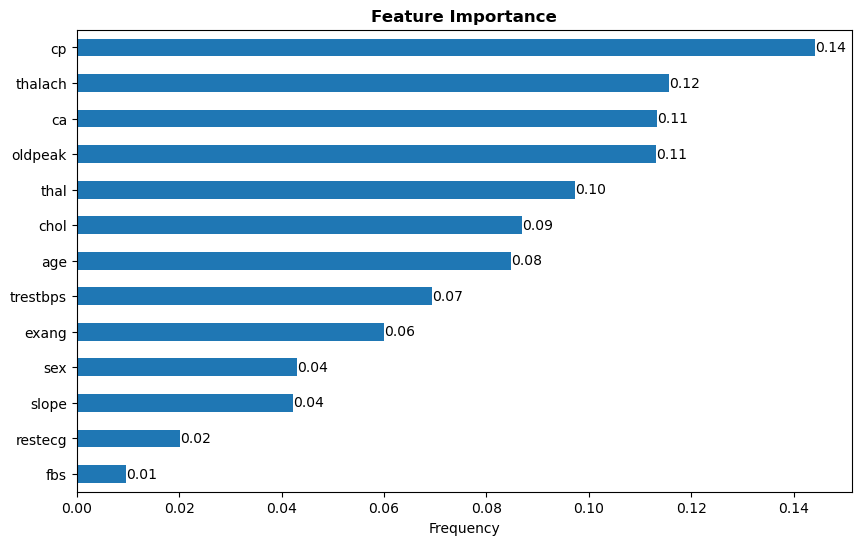

In [228]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
# Sort the DataFrame by values in ascending order
sorted_df = features_df.T.sort_values(by=0, ascending=True)
# Plot the sorted DataFrame
ax = sorted_df.plot(kind='barh', figsize=(10, 6), legend=False);
# Add text annotations for each bar
for i, v in enumerate(sorted_df[0]):
#     ax.text(v, i, str(v), ha='left', va='center')
    ax.text(v, i, f"{v:.2f}", ha='left', va='center')
plt.xlabel('Frequency');
plt.title('Feature Importance', fontweight='bold');
#plt.grid(linewidth=0.2, alpha=0.7)